In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure
from sklearn.ensemble import ExtraTreesRegressor
import joblib
import numpy as np
from windrose import WindroseAxes
import datetime
import WinFunctB7 as WFB7

In [6]:
markers={'Inside':'green','Outside':'yellow','OutOfService':'red'}
units_measure={'ActPower':'KW',
               'WindSpd':'m/s',
               'ThePower':'kWh',
               'WinDir':'º'}

In [7]:
turbine=pd.read_csv(r"C:\Datasets-base\Datasets\Scada\T1.csv")
if turbine.isnull().sum().sum()==0:
    print("No null values")
else:
    print("Atention - Null Values!!!!!")

No null values


In [8]:
dfTurbine=turbine.copy()
dfTurbine['Date/Time']=pd.to_datetime(dfTurbine['Date/Time'], format='%d %m %Y %H:%M')
dfTurbine.rename(columns={'Date/Time':'Date',
                          'LV ActivePower (kW)':'ActPower',
                          'Wind Speed (m/s)':'WindSpd',
                          'Theoretical_Power_Curve (KWh)':'ThePower',
                          'Wind Direction (°)':'WindDir'},inplace=True)


In [9]:
dfTurbine['Month']= dfTurbine['Date'].dt.month
dfTurbine['MonthChar']=dfTurbine.Month.apply(WFB7.nt_month)
dfTurbine["MeanWindSpd"]=dfTurbine.WindSpd.apply(WFB7.mean_speed)
dfTurbine["MeanWinDr"]=dfTurbine.WindDir.apply(WFB7.mean_direction)
dfTurbine["DirWin"]=dfTurbine.MeanWinDr.apply(WFB7.find_direction)

In [10]:
WFB7.labelStatusGen(dfTurbine)

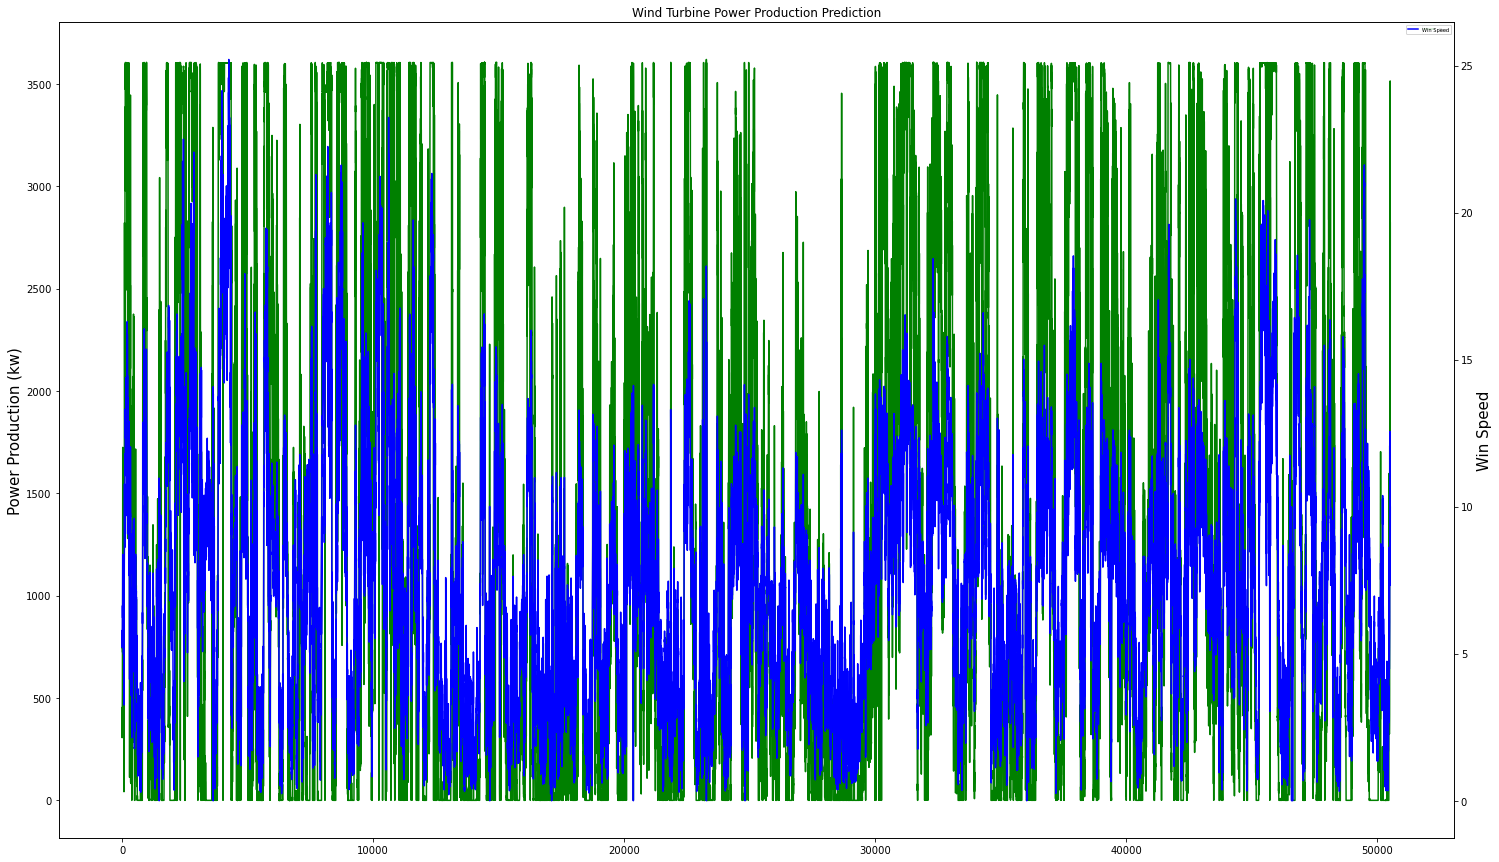

In [11]:

WFB7.plotdata(dfTurbine)

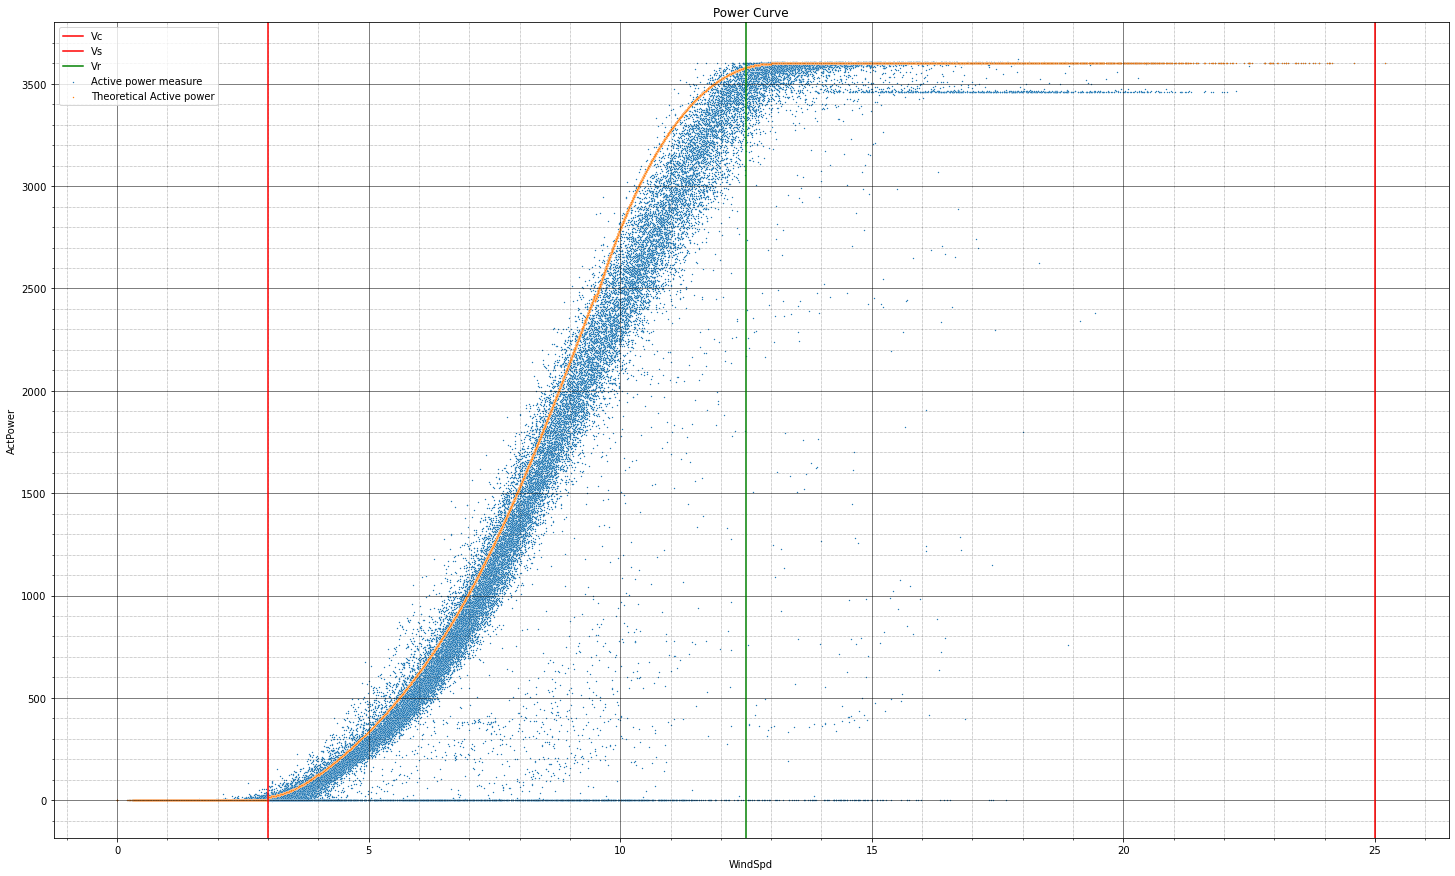

In [12]:

WFB7.pltpower(dfTurbine)

In [ ]:

WFB7.plotWindrose(dfTurbine)

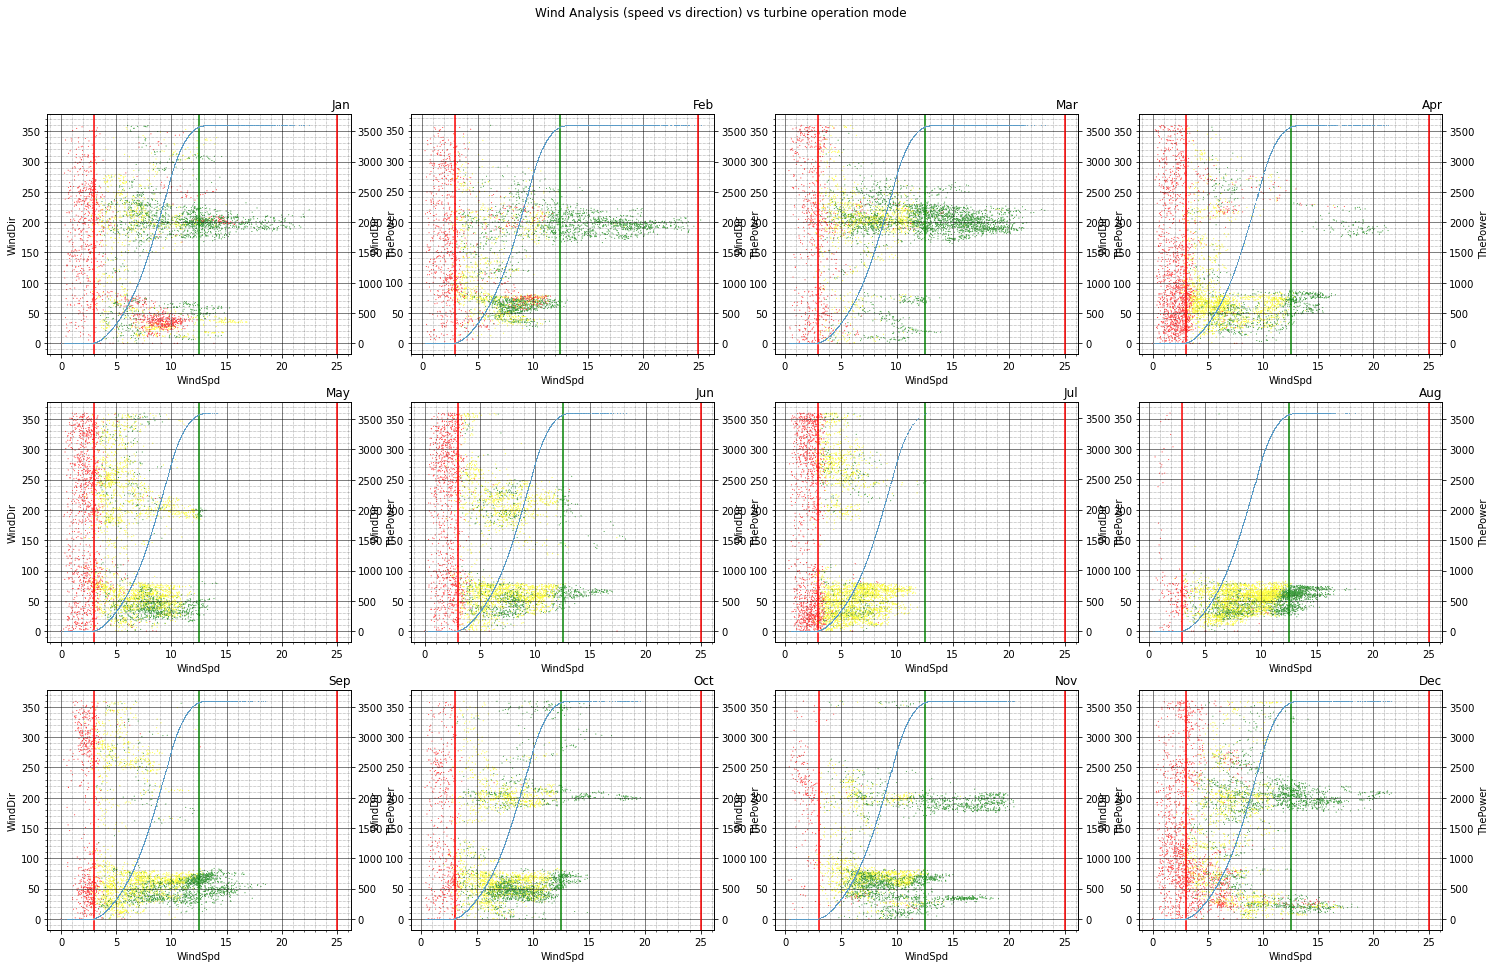

In [15]:

WFB7.PlotMonth(dfTurbine,markers)